In [1]:
from kennlinienschreiber import *
import ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

ser = open_unoR4_port()

# /dev/ttyS0 ttyS0
# /dev/ttyACM0 UNO R4 Minima - CDC Port
# Arduino found on port /dev/ttyACM0


In [2]:
# set at which DAC values to sample
dac_values = np.arange(0, 4096, 64, dtype=int)
adc_a1_values = np.empty_like(dac_values)
adc_a2_values = np.empty_like(dac_values)
adc_a3_values = np.empty_like(dac_values)
adc_a4_values = np.empty_like(dac_values)

In [3]:
# set the DAC, read the ADC for pin 1 and pin 2
for i in range(dac_values.size):
    set_dac(ser,dac_values[i])
    adc_a1_values[i] = read_adc(ser, 1)
    adc_a2_values[i] = read_adc(ser, 2)
    adc_a3_values[i] = read_adc(ser, 3)
    adc_a4_values[i] = read_adc(ser, 4)

In [4]:
# Define the resistors

R1 = 100.0      # 100 Ohms between A1 and A2
R2 = 4700.0     # 4.7kOhms between A3 and A4
R1_COLOR = "#69b3a2"    #R1 green-ish
R2_COLOR = "#3399e6"    #R2 blue

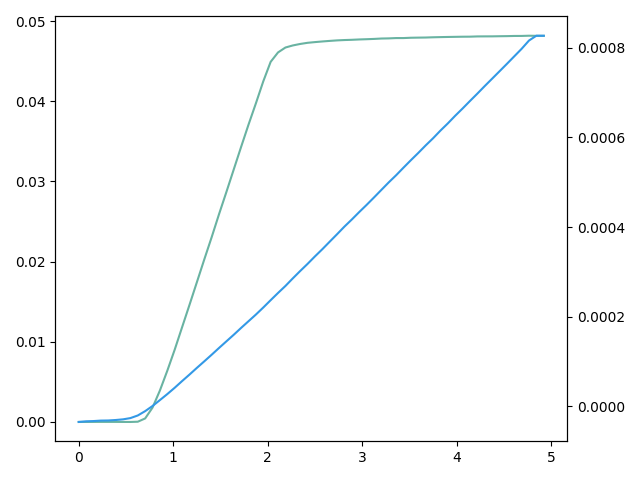

In [5]:
# compute the difference between a2 and a1, as well as a4 and a3
adc_a2a1 = np.subtract(adc_a2_values, adc_a1_values)
adc_a4a3 = np.subtract(adc_a4_values, adc_a3_values)

# scale by voltages
dac_volts = dac_values.astype('float64')
dac_volts /= 4096. / 5.
adc_volts_a2a1 = adc_a2a1.astype('float64')
adc_volts_a2a1 /= 16384. / 5.
adc_volts_a4a3 = adc_a4a3.astype('float64')
adc_volts_a4a3 /= 16384. / 5.

# compute currents
cur_a2a1 = adc_volts_a2a1 / R1
cur_a4a3 = adc_volts_a4a3 / R2


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(dac_volts, cur_a2a1, color=R1_COLOR)
ax2.plot(dac_volts, cur_a4a3, color=R2_COLOR)
fig.tight_layout()
plt.show()